In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
# dataScipy is my own library for data science, you can install it by writing "pip install dataScipy" in your terminal
# let me know if you have any issues with it, baktas19@ku.edu.tr
from dataScipy import DataScience as DS

### <span style="color:RED">QUESTION 2</span>

In [2]:
HACIOSMAN = pd.read_csv("Haciosman_2022.csv", header=None)

METRO_DAYS = list(HACIOSMAN[0])
METRO_PASSENGERS = list(HACIOSMAN[1])

### <span style="color:RED">2.a</span>

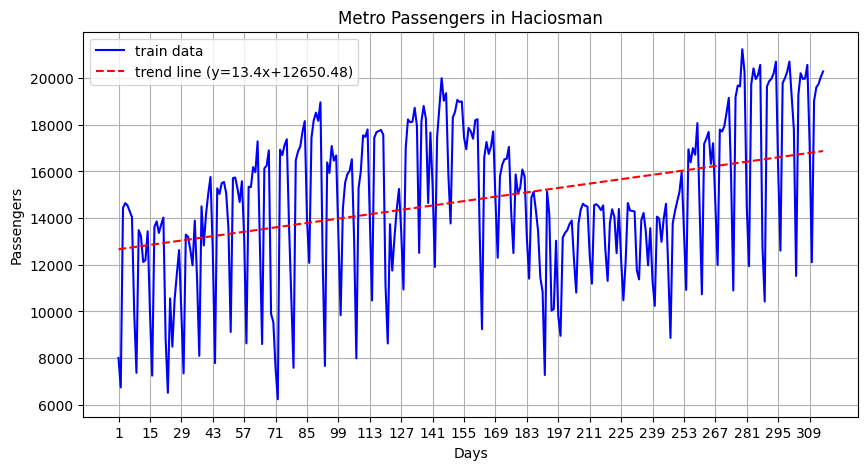

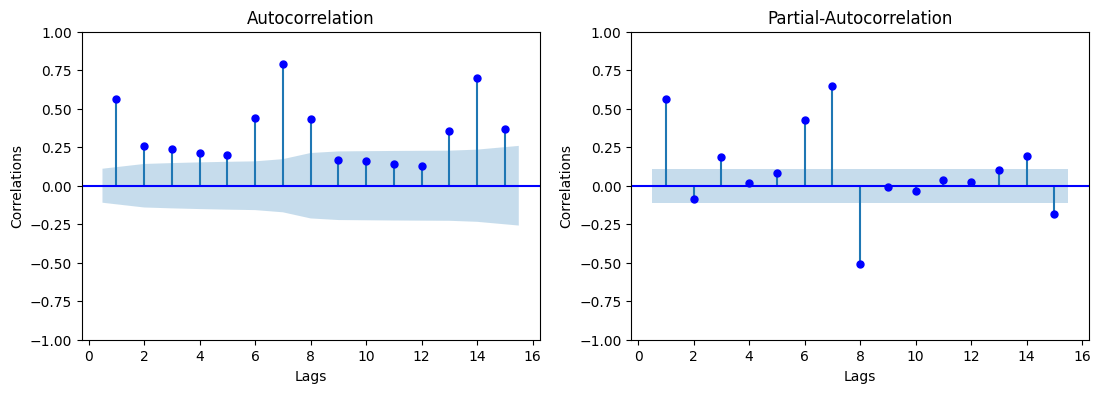

In [3]:
plt.figure(figsize=(10, 5))

z = np.polyfit(METRO_DAYS, METRO_PASSENGERS, 1)
p = np.poly1d(z)

plt.plot(METRO_DAYS, METRO_PASSENGERS, 'b', label='train data')
plt.plot(METRO_DAYS, p(METRO_DAYS), 'r--', label='trend line'+f' (y={round(z[0], 2)}x+{round(z[1], 2)})')
plt.xlabel('Days')
plt.ylabel('Passengers')
plt.grid()
plt.xticks(range(min(METRO_DAYS), max(METRO_DAYS)+1, 14))
plt.title('Metro Passengers in Haciosman')
plt.legend()
plt.show()

DS.plot_PACF_ACF_together(METRO_PASSENGERS, no_lags=15)

### <span style="color:RED">2.b</span>

In [4]:
# MODEL 1 - SARIMA(0, 1, 0)(0, 1, 0, 7)

MODEL1_ORDER = (0, 1, 0)
MODEL1_SEASONAL_ORDER = (0, 1, 0, 7)

SARIMA_MODEL1 = sm.tsa.statespace.SARIMAX(METRO_PASSENGERS, order=MODEL1_ORDER, seasonal_order=MODEL1_SEASONAL_ORDER).fit(disp=False)
print(SARIMA_MODEL1.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  315
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 7)   Log Likelihood               -2714.556
Date:                           Fri, 07 Apr 2023   AIC                           5431.112
Time:                                   19:49:07   BIC                           5434.839
Sample:                                        0   HQIC                          5432.603
                                           - 315                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      2.802e+06   1.54e+05     18.224      0.000     2.5e+06     3.1e+06
Ljung-Box (L1) (Q):                   8.57 

In [5]:
SARIMA_MODEL1_PREDICTIONS = list(SARIMA_MODEL1.predict())
SARIMA_MODEL1_PREDICTIONS[:8] = [None] * 8

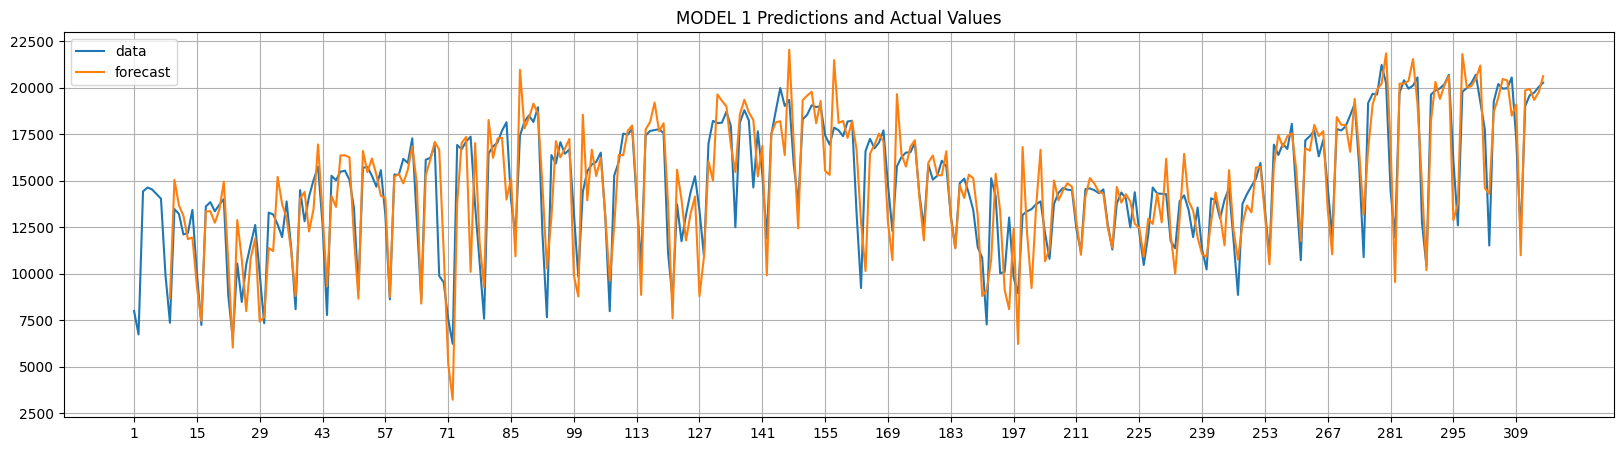

Error Summary
-------------
MAE: 1217.5896
MAPE: 9.0758
MSE: 2803916.9055
RMSE: 1674.4900

AIC: 5431.1124


In [6]:
DS.plot_forecasts(METRO_PASSENGERS, METRO_DAYS, SARIMA_MODEL1_PREDICTIONS, time_step=14, title='MODEL 1 Predictions and Actual Values', figsize=(20, 5))

DS.print_error_summary(METRO_PASSENGERS, SARIMA_MODEL1_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(SARIMA_MODEL1.aic))

### <span style="color:RED">2.c</span>

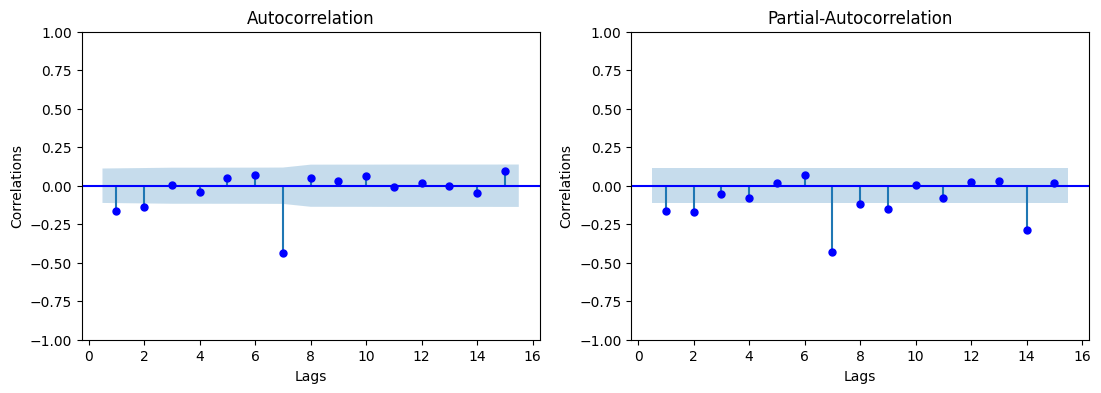

In [7]:
METRO_PASSENGERS_DEASEASON_DIFF= DS.take_diff_of_series(DS.deseasonalize_series(METRO_PASSENGERS, 7)[7:])
DS.plot_PACF_ACF_together(METRO_PASSENGERS_DEASEASON_DIFF, no_lags=15)

In [8]:
# MODEL 2 - SARIMA(0, 1, 0)(0, 1, 1, 7)

MODEL2_ORDER = (0, 1, 0)
MODEL2_SEASONAL_ORDER = (0, 1, 1, 7)

SARIMA_MODEL2 = sm.tsa.statespace.SARIMAX(METRO_PASSENGERS, order=MODEL2_ORDER, seasonal_order=MODEL2_SEASONAL_ORDER).fit(disp=False)
print(SARIMA_MODEL2.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  315
Model:             SARIMAX(0, 1, 0)x(0, 1, [1], 7)   Log Likelihood               -2660.099
Date:                             Fri, 07 Apr 2023   AIC                           5324.197
Time:                                     19:49:08   BIC                           5331.651
Sample:                                          0   HQIC                          5327.178
                                             - 315                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.S.L7       -0.6926      0.033    -20.980      0.000      -0.757      -0.628
sigma2      1.912e+06   1.0

In [9]:
SARIMA_MODEL2_PREDICTIONS = list(SARIMA_MODEL2.predict())

SARIMA_MODEL2_PREDICTIONS[:9] = [None] * 9

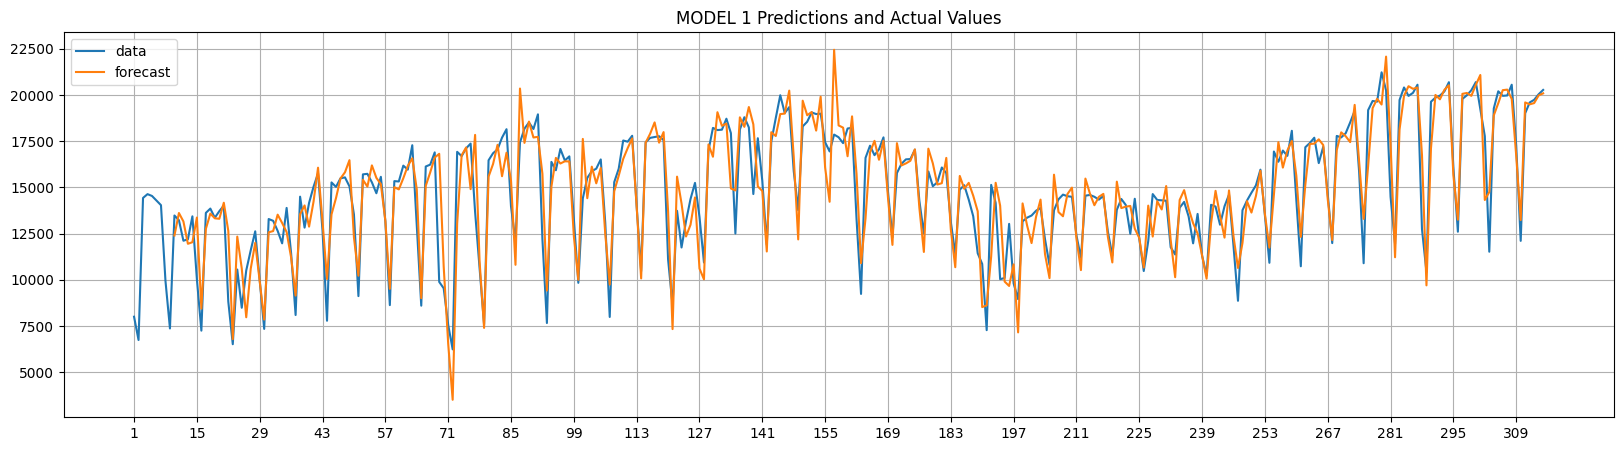

Error Summary
-------------
MAE: 995.1062
MAPE: 7.5028
MSE: 1961740.6921
RMSE: 1400.6215

AIC: 5324.1974


In [10]:
DS.plot_forecasts(METRO_PASSENGERS, METRO_DAYS, SARIMA_MODEL2_PREDICTIONS, time_step=14, title='MODEL 1 Predictions and Actual Values', figsize=(20, 5))

DS.print_error_summary(METRO_PASSENGERS, SARIMA_MODEL2_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)
print("\nAIC: {:.4f}".format(SARIMA_MODEL2.aic))

### <span style="color:RED">2.e</span>

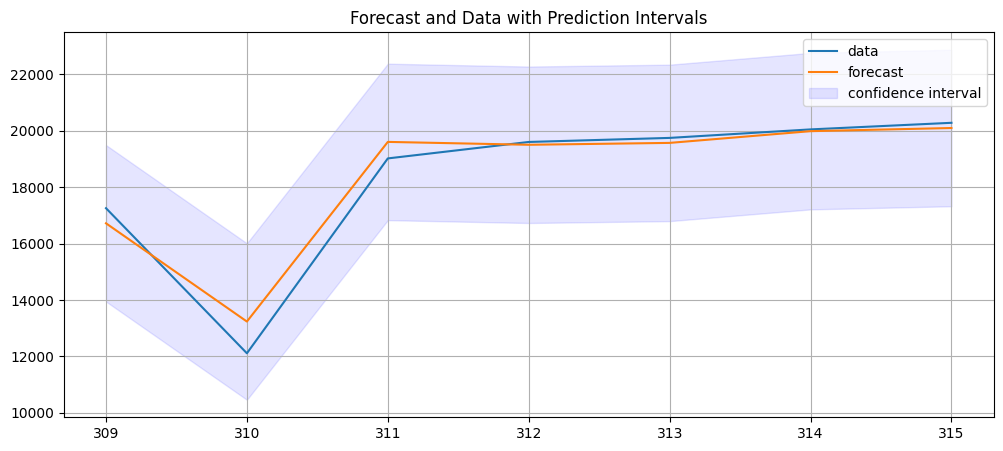

In [11]:
start_day = 308 # day 309

SARIMA_MODEL2_PREDICTIONS_until_start_day_RMSE = DS.RMSE(METRO_PASSENGERS[:start_day], SARIMA_MODEL2_PREDICTIONS[:start_day])

DS.plot_forecasts_predictIntervals(METRO_PASSENGERS[start_day:], METRO_DAYS[start_day:], SARIMA_MODEL2_PREDICTIONS[start_day:],
                                    error_value=SARIMA_MODEL2_PREDICTIONS_until_start_day_RMSE, percent=0.95, time_step=1)

### <span style="color:RED">2.f</span>

In [12]:
START_DAY = 316
END_DAY = 329

METRO_PASSENGERS_DUMMY = METRO_PASSENGERS + [0] * (END_DAY - START_DAY + 1)
METRO_DAYS_DUMMY = METRO_DAYS + list(range(START_DAY, END_DAY+1))

In [13]:
SARIMA_MODEL2_DUMMY = sm.tsa.statespace.SARIMAX(METRO_PASSENGERS_DUMMY, order=MODEL2_ORDER, seasonal_order=MODEL2_SEASONAL_ORDER).filter(SARIMA_MODEL2.params)

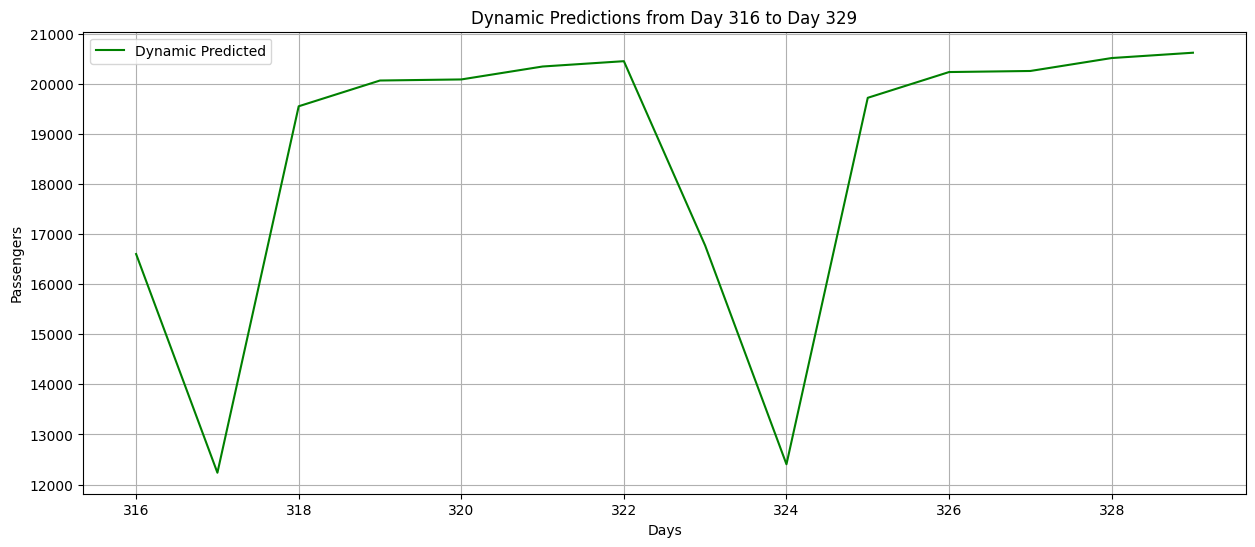

In [14]:
SARIMA_MODEL2_DUMMY_PREDICTIONS_DYNAMIC = list(SARIMA_MODEL2_DUMMY.get_prediction(dynamic=START_DAY-1).predicted_mean)

plt.figure(figsize=(15, 6))

plt.plot(METRO_DAYS_DUMMY[START_DAY-1:END_DAY+1], SARIMA_MODEL2_DUMMY_PREDICTIONS_DYNAMIC[START_DAY-1:END_DAY+1], label="Dynamic Predicted", color="green")
plt.title("Dynamic Predictions from Day {} to Day {}".format(START_DAY, END_DAY))
plt.xlabel("Days")
plt.ylabel("Passengers")
plt.yticks(range(12000, 22000, 1000))
plt.legend()
plt.grid()

### <span style="color:RED">2.g</span>

In [15]:
TRAIN_PERCENTAGE = 0.8

TRAIN_START = 0
TRAIN_END = int(len(METRO_DAYS) * TRAIN_PERCENTAGE)

TEST_START = int(len(METRO_DAYS) * TRAIN_PERCENTAGE)
TEST_END = len(METRO_DAYS)

METRO_PASSENGERS_TRAIN = METRO_PASSENGERS[TRAIN_START:TRAIN_END]
METRO_PASSENGERS_TEST = METRO_PASSENGERS[TEST_START:TEST_END]

METRO_DAYS_TRAIN = METRO_DAYS[TRAIN_START:TRAIN_END]
METRO_DAYS_TEST = METRO_DAYS[TEST_START:TEST_END]

In [16]:
## MODEL 1 ##

SARIMA_MODEL1_TRAIN = sm.tsa.statespace.SARIMAX(METRO_PASSENGERS_TRAIN, order=MODEL1_ORDER, seasonal_order=MODEL1_SEASONAL_ORDER).fit(disp=False)

SARIMA_MODEL1_TRAIN_PREDICTIONS = list(SARIMA_MODEL1_TRAIN.predict())
SARIMA_MODEL1_TRAIN_PREDICTIONS[:8] = [None] * 8

print(SARIMA_MODEL1_TRAIN.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  252
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 7)   Log Likelihood               -2170.013
Date:                           Fri, 07 Apr 2023   AIC                           4342.026
Time:                                   19:49:09   BIC                           4345.523
Sample:                                        0   HQIC                          4343.434
                                           - 252                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      3.104e+06   1.93e+05     16.079      0.000    2.73e+06    3.48e+06
Ljung-Box (L1) (Q):                   4.67 

In [17]:
SARIMA_MODEL1_SPECS = str('SARIMA' + str(MODEL1_ORDER) + str(MODEL1_SEASONAL_ORDER))
SARIMA_MODEL1_SPECS

'SARIMA(0, 1, 0)(0, 1, 0, 7)'

In [18]:
SARIMA_MODEL1_TRAIN_RMSE = DS.RMSE(METRO_PASSENGERS_TRAIN, SARIMA_MODEL1_TRAIN_PREDICTIONS)
SARIMA_MODEL1_TRAIN_MAPE = DS.MAPE(METRO_PASSENGERS_TRAIN, SARIMA_MODEL1_TRAIN_PREDICTIONS)

print('For the Trained Data with MODEL 1 - ' + 'SARIMA' + str(MODEL1_ORDER) + str(MODEL1_SEASONAL_ORDER))
print("RMSE: {:.4f}".format(SARIMA_MODEL1_TRAIN_RMSE))
print("MAPE: %{:.4f}".format(SARIMA_MODEL1_TRAIN_MAPE))

For the Trained Data with MODEL 1 - SARIMA(0, 1, 0)(0, 1, 0, 7)
RMSE: 1762.6201
MAPE: %9.8370


In [19]:
SARIMA_MODEL1_TEST = sm.tsa.statespace.SARIMAX(METRO_PASSENGERS, order=MODEL1_ORDER, seasonal_order=MODEL1_SEASONAL_ORDER).filter(SARIMA_MODEL1_TRAIN.params)

SARIMA_MODEL1_TEST_PREDICTIONS = list(SARIMA_MODEL1_TEST.predict())[TEST_START:TEST_END]

In [20]:
SARIMA_MODEL1_TEST_RMSE = DS.RMSE(METRO_PASSENGERS_TEST, SARIMA_MODEL1_TEST_PREDICTIONS)
SARIMA_MODEL1_TEST_MAPE = DS.MAPE(METRO_PASSENGERS_TEST, SARIMA_MODEL1_TEST_PREDICTIONS)

print('For the Test Data trained with MODEL 1 - ' + 'SARIMA' + str(MODEL1_ORDER) + str(MODEL1_SEASONAL_ORDER))
print("RMSE: {:.4f}".format(SARIMA_MODEL1_TEST_RMSE))
print("MAPE: %{:.4f}".format(SARIMA_MODEL1_TEST_MAPE))

For the Test Data trained with MODEL 1 - SARIMA(0, 1, 0)(0, 1, 0, 7)
RMSE: 1277.0007
MAPE: %6.1280


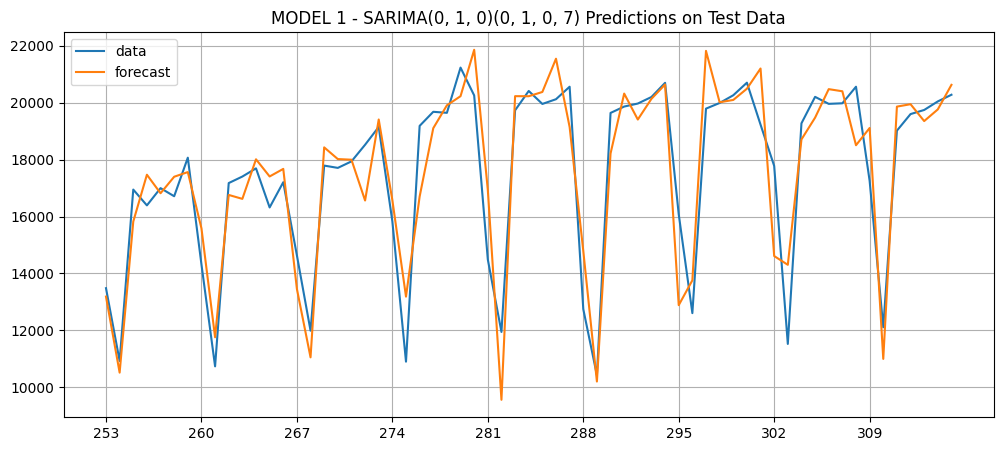

Error Summary
-------------
MAE: 979.8730
MAPE: 6.1280
MSE: 1630730.8254
RMSE: 1277.0007


In [21]:
DS.plot_forecasts(METRO_PASSENGERS_TEST, METRO_DAYS_TEST, SARIMA_MODEL1_TEST_PREDICTIONS, time_step=7, title='MODEL 1 - SARIMA' + str(MODEL1_ORDER) + str(MODEL1_SEASONAL_ORDER) + ' Predictions on Test Data')

DS.print_error_summary(METRO_PASSENGERS_TEST, SARIMA_MODEL1_TEST_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

In [22]:
## MODEL 2 ##

SARIMA_MODEL2_TRAIN = sm.tsa.statespace.SARIMAX(METRO_PASSENGERS_TRAIN, order=MODEL2_ORDER, seasonal_order=MODEL2_SEASONAL_ORDER).fit(disp=False)

SARIMA_MODEL2_TRAIN_PREDICTIONS = list(SARIMA_MODEL2_TRAIN.predict())
SARIMA_MODEL2_TRAIN_PREDICTIONS[:9] = [None] * 9

In [23]:
SARIMA_MODEL2_SPECS = str('SARIMA' + str(MODEL2_ORDER) + str(MODEL2_SEASONAL_ORDER) + 
                          ' theta_7: ' + str(round(SARIMA_MODEL2_TRAIN.params[0], 4)))
SARIMA_MODEL2_SPECS

'SARIMA(0, 1, 0)(0, 1, 1, 7) theta_7: -0.7745'

In [24]:
SARIMA_MODEL2_TRAIN_RMSE = DS.RMSE(METRO_PASSENGERS_TRAIN, SARIMA_MODEL2_TRAIN_PREDICTIONS)
SARIMA_MODEL2_TRAIN_MAPE = DS.MAPE(METRO_PASSENGERS_TRAIN, SARIMA_MODEL2_TRAIN_PREDICTIONS)

print('For the Trained Data with MODEL 2 - ' + 'SARIMA' + str(MODEL2_ORDER) + str(MODEL2_SEASONAL_ORDER))
print("RMSE: {:.4f}".format(SARIMA_MODEL2_TRAIN_RMSE))
print("MAPE: %{:.4f}".format(SARIMA_MODEL2_TRAIN_MAPE))

For the Trained Data with MODEL 2 - SARIMA(0, 1, 0)(0, 1, 1, 7)
RMSE: 1417.9891
MAPE: %7.9623


In [25]:
SARIMA_MODEL2_TEST = sm.tsa.statespace.SARIMAX(METRO_PASSENGERS, order=MODEL2_ORDER, seasonal_order=MODEL2_SEASONAL_ORDER).filter(SARIMA_MODEL2_TRAIN.params)

SARIMA_MODEL2_TEST_PREDICTIONS = list(SARIMA_MODEL2_TEST.predict())[TEST_START:TEST_END]

In [26]:
SARIMA_MODEL2_TEST_RMSE = DS.RMSE(METRO_PASSENGERS_TEST, SARIMA_MODEL2_TEST_PREDICTIONS)
SARIMA_MODEL2_TEST_MAPE = DS.MAPE(METRO_PASSENGERS_TEST, SARIMA_MODEL2_TEST_PREDICTIONS)

print('For the Test Data trained with MODEL 2 - ' + 'SARIMA' + str(MODEL2_ORDER) + str(MODEL2_SEASONAL_ORDER))
print("RMSE: {:.4f}".format(SARIMA_MODEL2_TEST_RMSE))
print("MAPE: %{:.4f}".format(SARIMA_MODEL2_TEST_MAPE))

For the Test Data trained with MODEL 2 - SARIMA(0, 1, 0)(0, 1, 1, 7)
RMSE: 1370.2651
MAPE: %5.8179


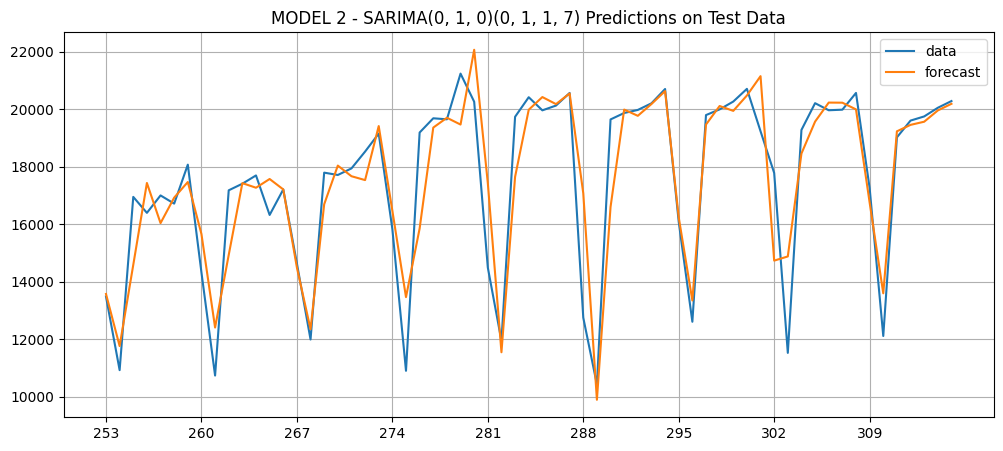

Error Summary
-------------
MAE: 907.4887
MAPE: 5.8179
MSE: 1877626.3229
RMSE: 1370.2651


In [27]:
DS.plot_forecasts(METRO_PASSENGERS_TEST, METRO_DAYS_TEST, SARIMA_MODEL2_TEST_PREDICTIONS, time_step=7, title='MODEL 2 - SARIMA' + str(MODEL2_ORDER) + str(MODEL2_SEASONAL_ORDER) + ' Predictions on Test Data')

DS.print_error_summary(METRO_PASSENGERS_TEST, SARIMA_MODEL2_TEST_PREDICTIONS, MAE=DS.MAE, MAPE=DS.MAPE, MSE=DS.MSE, RMSE=DS.RMSE)

### <span style="color:RED">2.h</span>

In [28]:
pd.options.display.float_format = '{:.3f}'.format
pd.options.display.max_colwidth = 100

QUESTION2_DF = pd.DataFrame({'Method':['Model 1', 'Model 2'],
                             'Spec.' : [SARIMA_MODEL1_SPECS, SARIMA_MODEL2_SPECS],
                                'RMSE (Train)': [SARIMA_MODEL1_TRAIN_RMSE, SARIMA_MODEL2_TRAIN_RMSE],
                                'RMSE (Test)': [SARIMA_MODEL1_TEST_RMSE, SARIMA_MODEL2_TEST_RMSE],
                                'MAPE (Train)': [SARIMA_MODEL1_TRAIN_MAPE, SARIMA_MODEL2_TRAIN_MAPE],
                                'MAPE (Test)': [SARIMA_MODEL1_TEST_MAPE, SARIMA_MODEL2_TEST_MAPE]})

In [29]:
QUESTION2_DF

,Method,Spec.,RMSE (Train),RMSE (Test),MAPE (Train),MAPE (Test)
0,Model 1,"SARIMA(0, 1, 0)(0, 1, 0, 7)",1762.620,1277.001,9.837,6.128
1,Model 2,"SARIMA(0, 1, 0)(0, 1, 1, 7) theta_7: -0.7745",1417.989,1370.265,7.962,5.818
